<a href="https://colab.research.google.com/github/aTrotier/COURS_RECO_BART/blob/main/correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Dans ce cours nous utiliserons [BART](https://mrirecon.github.io/bart/) qui est une librairie de fonction permettant de reconstruire les données IRM

La première étape et d'installer BART dans google colab : https://colab.research.google.com/

# Installation librairie

In [2]:
!apt-get -qq install -y  gcc make libfftw3-dev liblapacke-dev libpng-dev libopenblas-dev gfortran

Selecting previously unselected package libfftw3-long3:amd64.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../0-libfftw3-long3_3.3.7-1_amd64.deb ...
Unpacking libfftw3-long3:amd64 (3.3.7-1) ...
Selecting previously unselected package libfftw3-quad3:amd64.
Preparing to unpack .../1-libfftw3-quad3_3.3.7-1_amd64.deb ...
Unpacking libfftw3-quad3:amd64 (3.3.7-1) ...
Selecting previously unselected package libfftw3-single3:amd64.
Preparing to unpack .../2-libfftw3-single3_3.3.7-1_amd64.deb ...
Unpacking libfftw3-single3:amd64 (3.3.7-1) ...
Selecting previously unselected package libfftw3-bin.
Preparing to unpack .../3-libfftw3-bin_3.3.7-1_amd64.deb ...
Unpacking libfftw3-bin (3.3.7-1) ...
Selecting previously unselected package libfftw3-dev:amd64.
Preparing to unpack .../4-libfftw3-dev_3.3.7-1_amd64.deb ...
Unpacking libfftw3-dev:amd64 (3.3.7-1) ...
Selecting previously unselected package liblapacke:amd64.
Preparing to unpack .../5-liblapacke_

# Installation de BART à partir de github

In [3]:
!git clone https://github.com/mrirecon/bart

Cloning into 'bart'...
remote: Enumerating objects: 12256, done.
remote: Counting objects: 100% (491/491), done.
remote: Compressing objects: 100% (300/300), done.
remote: Total 12256 (delta 277), reused 310 (delta 190), pack-reused 11765
Receiving objects: 100% (12256/12256), 8.23 MiB | 24.16 MiB/s, done.
Resolving deltas: 100% (8888/8888), done.


Checkout vers version 0.7



In [4]:
cd bart

/content/bart


In [5]:
!git checkout v0.7.00

Note: checking out 'v0.7.00'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at d1b0e57 bump version


**Compilation**

In [6]:
!PARALLEL=1 make

make MAKESTAGE=2 
make[1]: Entering directory '/content/bart'
CONFIGURATION MODIFIED. RUNNING FULL REBUILD.
touch isclean
make allclean || rm isclean
make[2]: Entering directory '/content/bart'
rm -f `find /content/bart/src -name "*.o"`
rm -f /content/bart/utests/*.o
rm -f  test_linop_matrix  test_linop  test_batchsvd  test_pattern  test_types  test_misc  test_moba  test_nlop  test_nufft  test_multind  test_flpmath  test_splines  test_linalg  test_polynom  test_window  test_conv  test_blas  test_mdfft  test_ops  test_ops_p  test_flpmath2  test_ode_bloch  test_biot_savart  test_signals  test_geom  test_iter  test_prox
rm -f /content/bart/lib/.*.lock
rm -f /content/bart/lib/*.a 
rm -f  bart  avg  bench  bin  bitmask  cabs  caldir  calmat  carg  casorati  cc  ccapply  cdf97  circshift  conj  conv  conway  copy  cpyphs  creal  crop  delta  ecalib  ecaltwo  estdelay  estdims  estshift  estvar  extract  fakeksp  fft  fftmod  fftrot  fftshift  filter  flatten  flip  fmac  homodyne  index  inv

In [7]:
!make install

make MAKESTAGE=2 install
make[1]: Entering directory '/content/bart'
install -d //usr/local//bin/
install bart //usr/local//bin/
install -d //usr/local//share/doc/bart/
install /content/bart/doc/*.txt /content/bart/README //usr/local//share/doc/bart/
install -d //usr/local//lib/bart/commands/
make[1]: Leaving directory '/content/bart'
install -d //usr/local//bin/
install bart //usr/local//bin/
install -d //usr/local//share/doc/bart/
install /content/bart/doc/*.txt /content/bart/README //usr/local//share/doc/bart/
install -d //usr/local//lib/bart/commands/


In [8]:
!bart

BART. Available commands are:
avg         bench       bin         bitmask     cabs        caldir      
calmat      carg        casorati    cc          ccapply     cdf97       
circshift   conj        conv        conway      copy        cpyphs      
creal       crop        delta       ecalib      ecaltwo     estdelay    
estdims     estshift    estvar      extract     fakeksp     fft         
fftmod      fftrot      fftshift    filter      flatten     flip        
fmac        homodyne    index       invert      itsense     join        
looklocker  lrmatrix    mandelbrot  mip         moba        mobafit     
nlinv       noise       normalize   nrmse       nufft       ones        
pattern     phantom     pics        pocsense    poisson     pol2mask    
poly        repmat      reshape     resize      rmfreq      rof         
roistat     rss         rtnlinv     sake        saxpy       scale       
sdot        show        signal      slice       spow        sqpics      
squeeze     ssa      

# Test utilisation BART avec Python

Préparation des fonctions pour être utilisées avec python

In [9]:
import os
import sys
import numpy as np

os.environ['TOOLBOX_PATH'] = '/content/bart'
path = os.environ["TOOLBOX_PATH"] + "/python/"
sys.path.append(path)

from bart import bart
import cfl

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

Generate a phantom with BART and plot the image

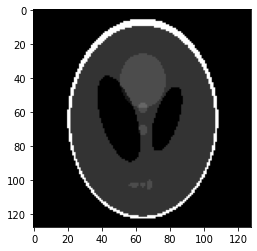

In [10]:
x = bart(1, 'phantom')
plt.figure()
plt.imshow(abs(x), cmap='gray')

# Utilisation bart

BART s'utilise en ligne de commande mais peut être utilisé gâce à un wrapper python (ce que l'on fera dans la suite de ce cours)

In [11]:
!bart phantom -h

Usage: phantom [-s d] [-S d] [-k] [-t <string>] [-G ...] [-T ...] [-N d] [-B ...] [-x d] [-g d] [-3] [-b] [-r d] <output>

Image and k-space domain phantoms.

-s nc      	nc sensitivities
-S nc      	Output nc sensitivities
-k		k-space
-t file      	trajectory
-G		geometric object phantom
-T		tubes phantom
-N num      	Random tubes phantom and number
-B		BART logo
-x n      	dimensions in y and z
-g n=1,2      	select geometry for object phantom
-3		3D
-b		basis functions for geometry
-r seed      	random seed initialization
-h		help


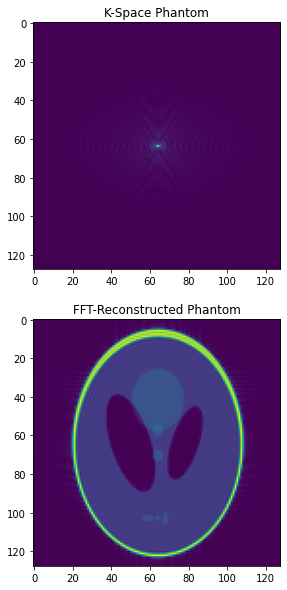

In [12]:
# Generating a k-space phantom and applying an inverse FFT.
shepp_kspace = bart(1, "phantom -k -x 128")
shepp_fft = bart(1, "fft -i 3", shepp_kspace)

fig, ax = plt.subplots(nrows=2, figsize=(6, 10))
ax[0].set_title("K-Space Phantom")
ax[0].imshow(abs(shepp_kspace))

ax[1].set_title("FFT-Reconstructed Phantom")
ax[1].imshow(abs(shepp_fft))

# Génération d'un mask pour sous-échantillonner dans une direction

(128, 128)

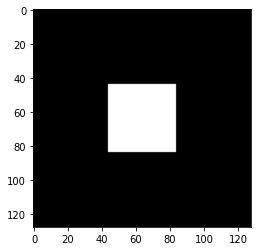

In [14]:
display(np.shape(shepp_kspace))

# mask pour garder que les lignes centrales du kspace
mask = np.zeros(np.shape(shepp_kspace))

kx1 = 44
kx2 = 84
ky1 = 44
ky2 = 84
mask[kx1:kx2,ky1:ky2]=np.ones(np.shape(mask[kx1:kx2,ky1:ky2]))

plt.figure()
plt.imshow(abs(mask), cmap='gray')

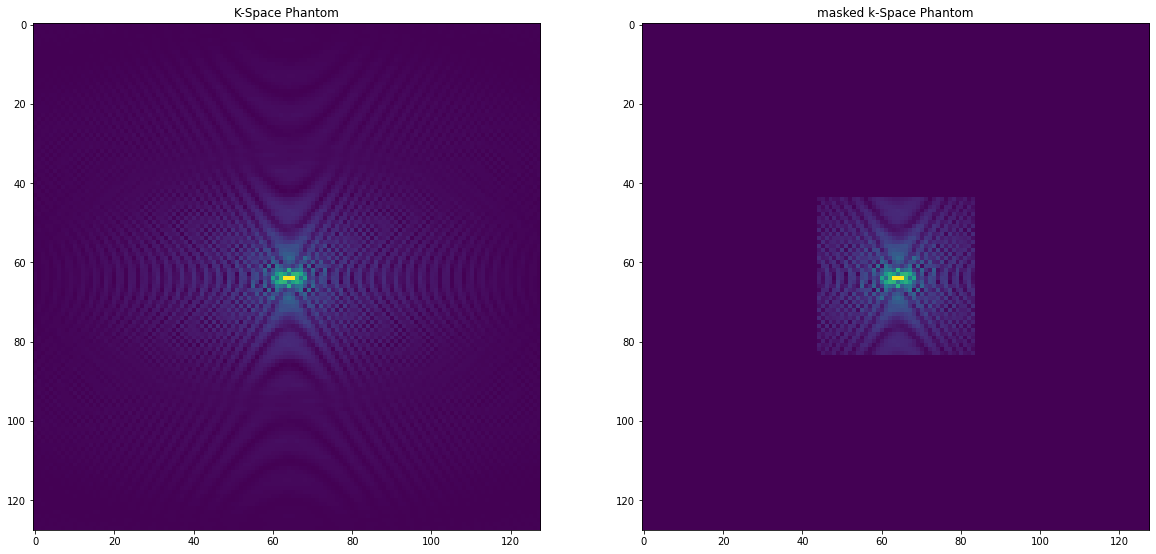

In [15]:
shepp_kspace_u = shepp_kspace * mask;

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].set_title("K-Space Phantom")
ax[0].imshow(abs(shepp_kspace),vmin=0, vmax=0.03)

ax[1].set_title("masked k-Space Phantom")
ax[1].imshow(abs(shepp_kspace_u),vmin=0, vmax=0.03)

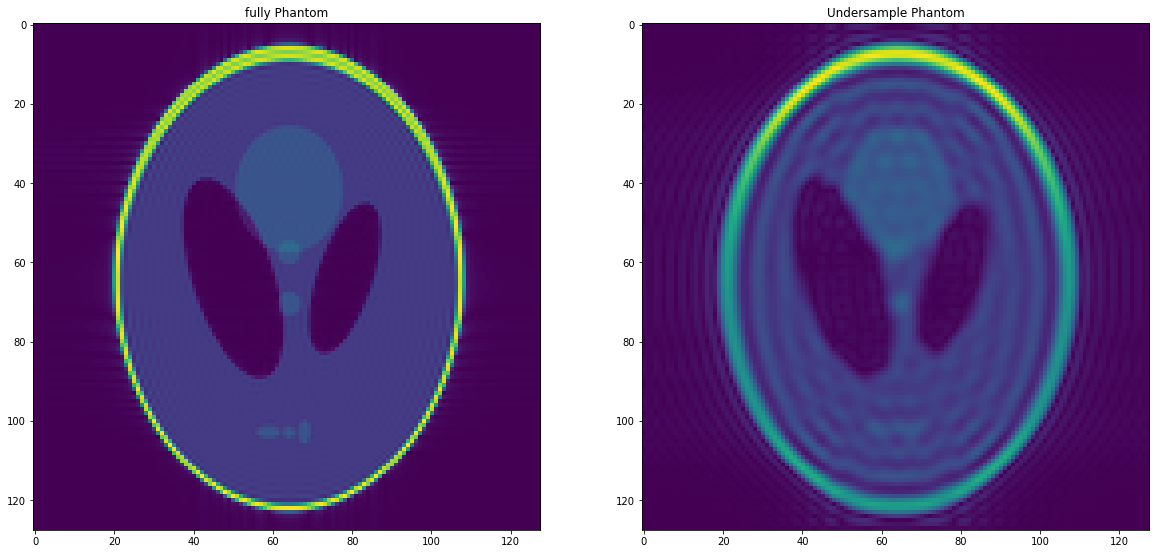

In [16]:
shepp_fft_u = bart(1, "fft -i 3", shepp_kspace_u)

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].set_title("fully Phantom")
ax[0].imshow(abs(shepp_fft))

ax[1].set_title("Undersample Phantom")
ax[1].imshow(abs(shepp_fft_u))

(128, 128)

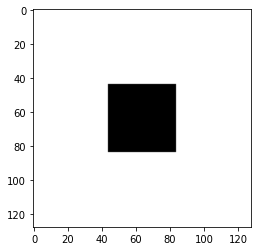

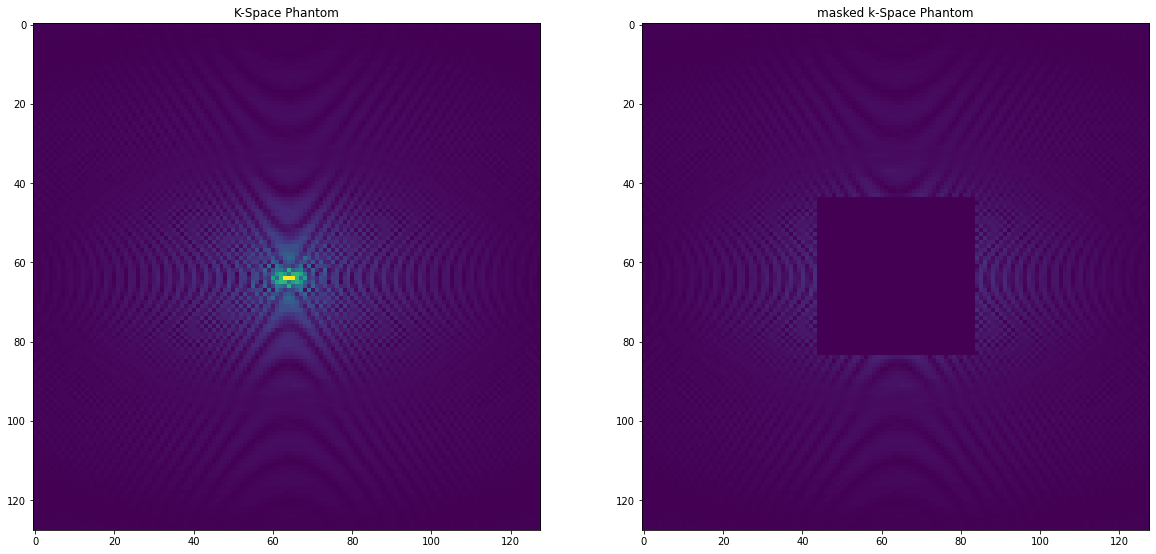

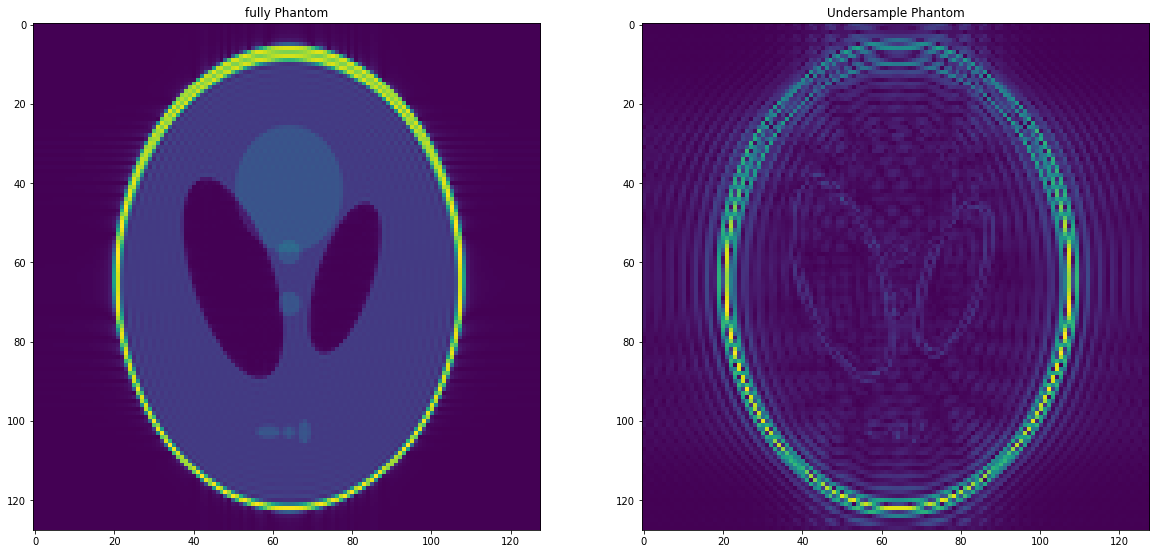

In [18]:
display(np.shape(shepp_kspace))

# mask pour garder que les lignes centrales du kspace
mask = np.ones(np.shape(shepp_kspace))

kx1 = 44
kx2 = 84
ky1 = 44
ky2 = 84
mask[kx1:kx2,ky1:ky2]=np.zeros(np.shape(mask[kx1:kx2,ky1:ky2]))

plt.figure()
plt.imshow(abs(mask), cmap='gray')

shepp_kspace_u = shepp_kspace * mask;

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].set_title("K-Space Phantom")
ax[0].imshow(abs(shepp_kspace),vmin=0, vmax=0.03)

ax[1].set_title("masked k-Space Phantom")
ax[1].imshow(abs(shepp_kspace_u),vmin=0, vmax=0.03)

shepp_fft_u = bart(1, "fft -i 3", shepp_kspace_u)

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].set_title("fully Phantom")
ax[0].imshow(abs(shepp_fft))

ax[1].set_title("Undersample Phantom")
ax[1].imshow(abs(shepp_fft_u))

# Zero-filling reconstruction

(256, 256)

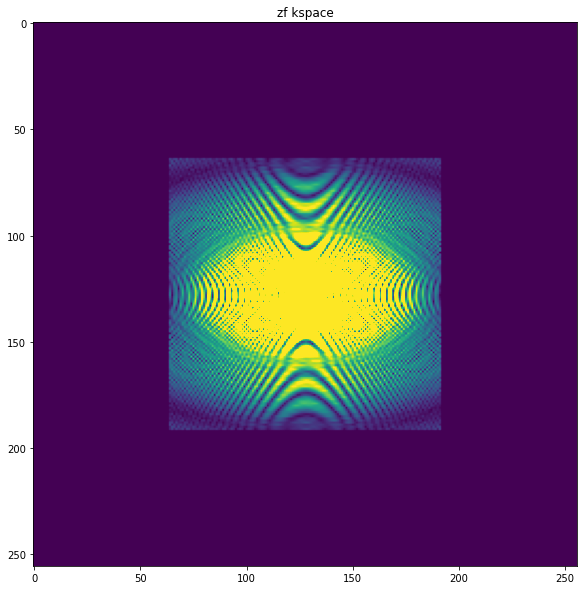

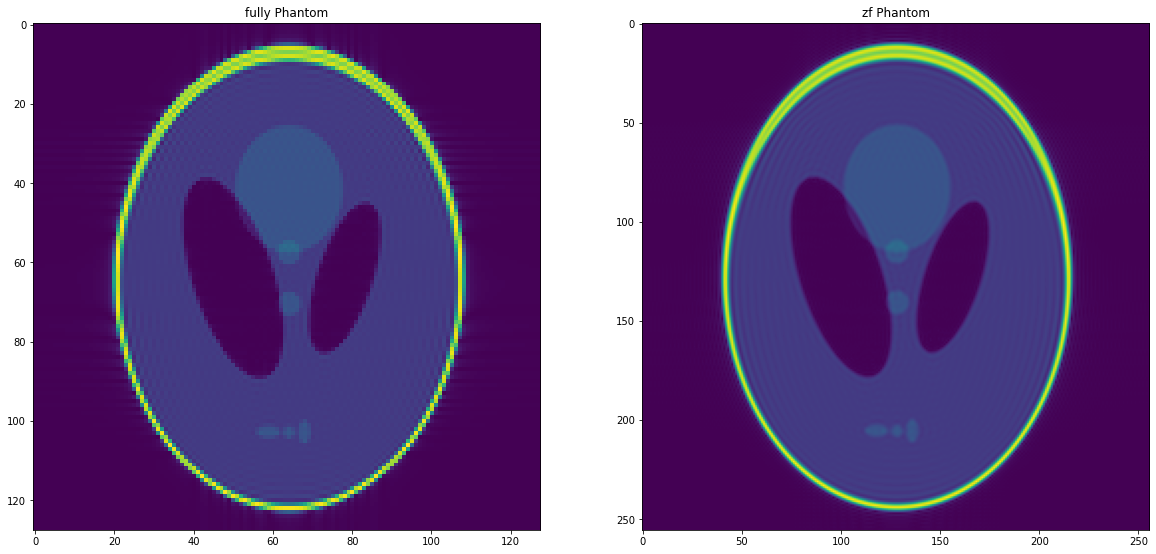

In [19]:
shepp_kspace_zf = np.zeros((256,256),dtype=complex)
display(np.shape(shepp_kspace_zf))

shepp_kspace_zf[64:64+128,64:64+128]=shepp_kspace

shepp_fft_zf = bart(1, "fft -i 3", shepp_kspace_zf)


fig, ax = plt.subplots(ncols=1, figsize=(20, 10))
ax.set_title("zf kspace")
ax.imshow(abs(shepp_kspace_zf),vmin=0, vmax=0.001)

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].set_title("fully Phantom")
ax[0].imshow(abs(shepp_fft))

ax[1].set_title("zf Phantom")
ax[1].imshow(abs(shepp_fft_zf))

# Sous-echantillonage

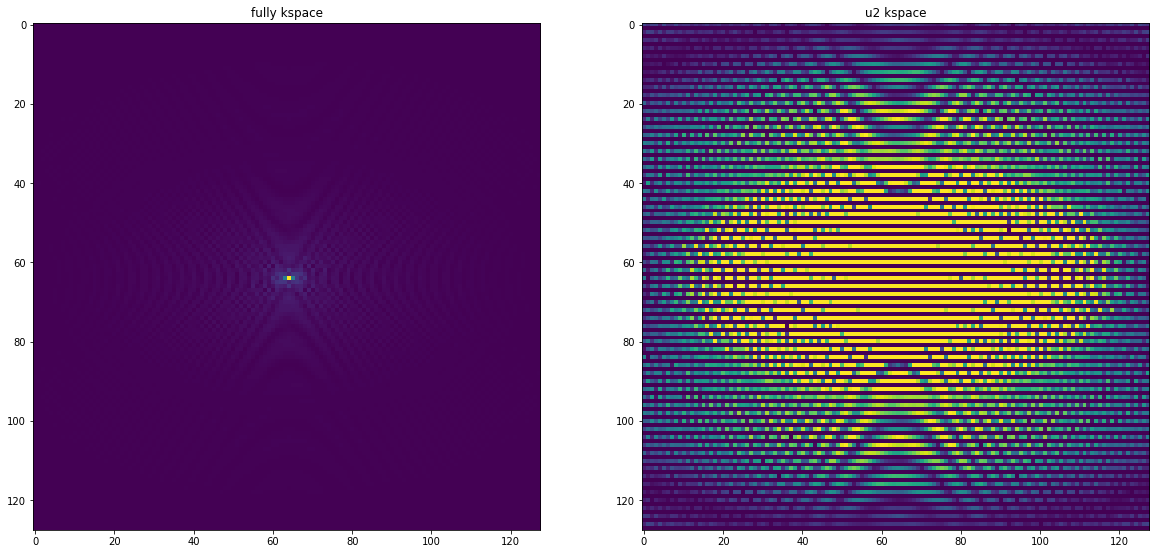

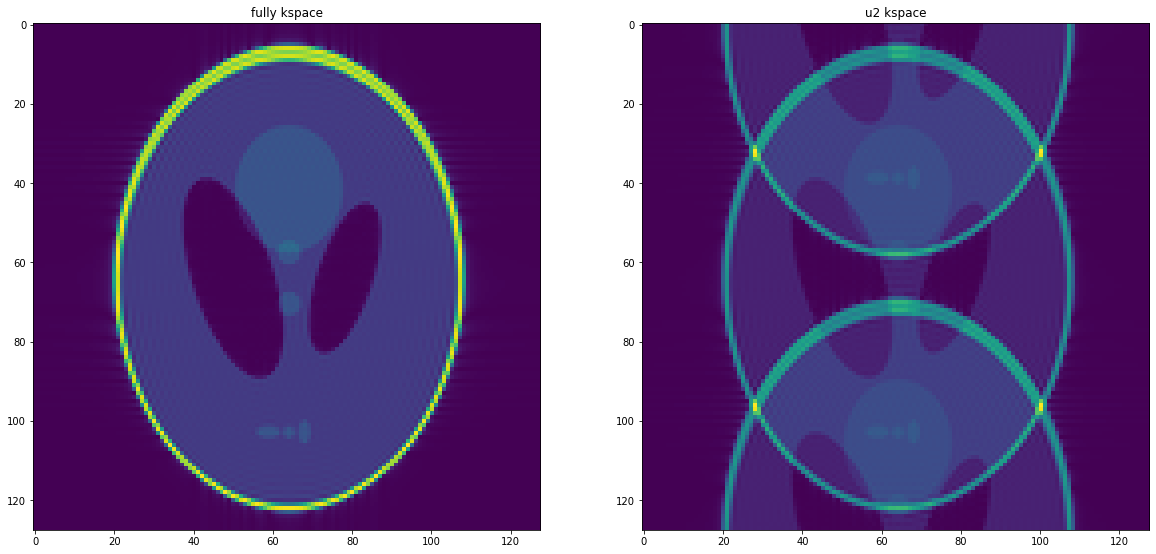

In [20]:
# mettre à 0 une ligne sur 2
shepp_kspace_u2 = np.zeros(shepp_kspace.shape,dtype=complex)
shepp_kspace_u2[0::2,:]=shepp_kspace[0::2,:]

shepp_fft_u2 = bart(1, "fft -i 3", shepp_kspace_u2)

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].set_title("fully kspace")
ax[0].imshow(abs(shepp_kspace),vmin=0, vmax=0.001)

ax[1].set_title("u2 kspace")
ax[1].imshow(abs(shepp_kspace_u2),vmin=0, vmax=0.001)

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].set_title("fully kspace")
ax[0].imshow(abs(shepp_fft))

ax[1].set_title("u2 kspace")
ax[1].imshow(abs(shepp_fft_u2))

$$ im_u(x,y) = im(x,y)+im(x+128/2,y)$$

# Antennes multiples

In [ ]:
!bart phantom -h

Usage: phantom [-s d] [-S d] [-k] [-t <string>] [-G ...] [-T ...] [-N d] [-B ...] [-x d] [-g d] [-3] [-b] [-r d] <output>

Image and k-space domain phantoms.

-s nc      	nc sensitivities
-S nc      	Output nc sensitivities
-k		k-space
-t file      	trajectory
-G		geometric object phantom
-T		tubes phantom
-N num      	Random tubes phantom and number
-B		BART logo
-x n      	dimensions in y and z
-g n=1,2      	select geometry for object phantom
-3		3D
-b		basis functions for geometry
-r seed      	random seed initialization
-h		help


## Generation des données avec plusieurs antennes

In [154]:
# generation des données

kspace_8ch_no_noise = bart(1,"phantom -k -s 8")
kspace_8ch = bart(1,"noise -n 10",kspace_8ch_no_noise)
display(np.shape(kspace_8ch))

im_8ch = bart(1,"fft -i 3",kspace_8ch)

(128, 128, 1, 8)

(128, 128)

(128, 128)

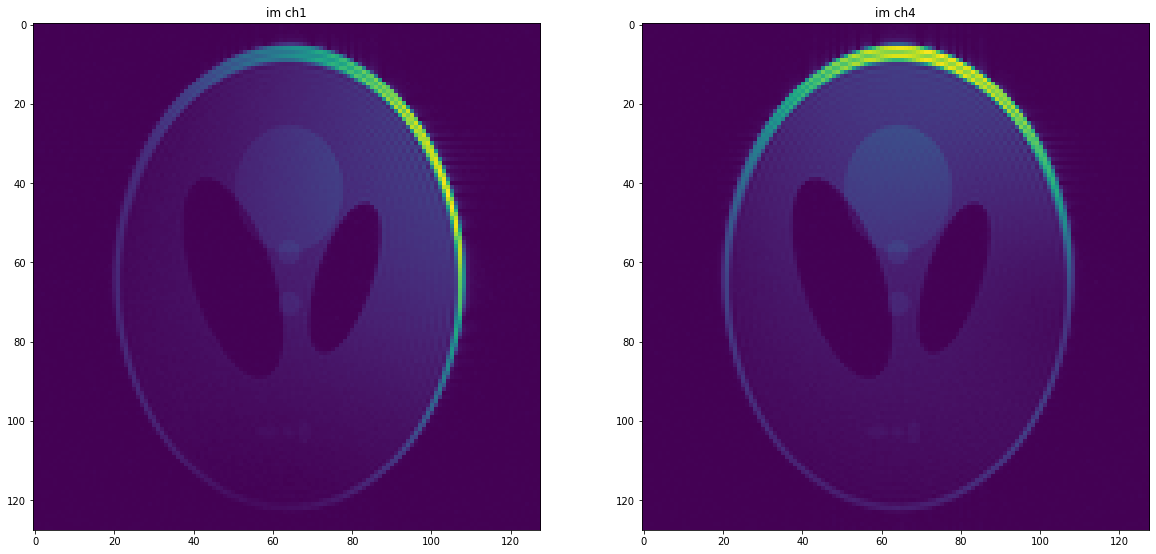

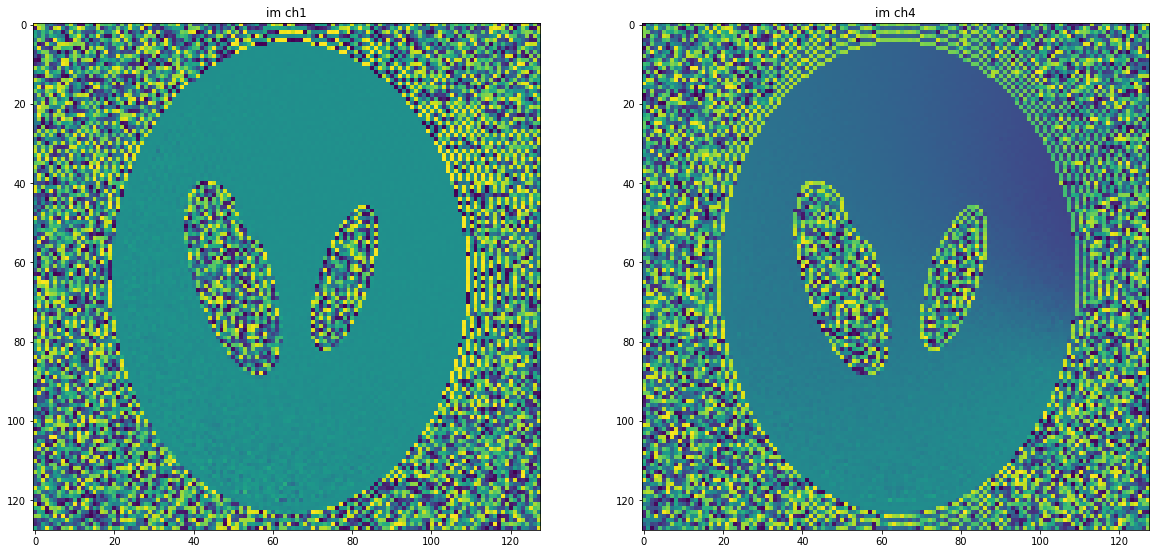

In [155]:
display(np.shape(im_8ch[:,:,0,1]))
display(np.shape(np.squeeze(im_8ch[:,:,:,1])))

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].set_title("im ch1")
ax[0].imshow(abs(np.squeeze(im_8ch[:,:,:,0])))

ax[1].set_title("im ch4")
ax[1].imshow(abs(np.squeeze(im_8ch[:,:,:,1])))

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].set_title("im ch1")
ax[0].imshow(np.angle(np.squeeze(im_8ch[:,:,:,0])))

ax[1].set_title("im ch4")
ax[1].imshow(np.angle(np.squeeze(im_8ch[:,:,:,1])))

## Différentes méthodes de combinaison

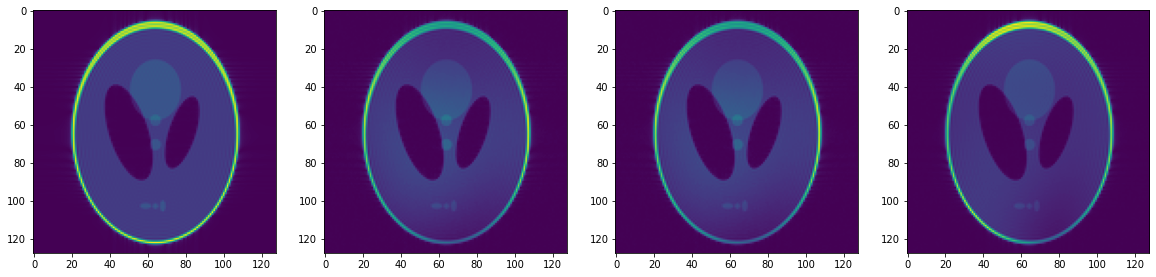

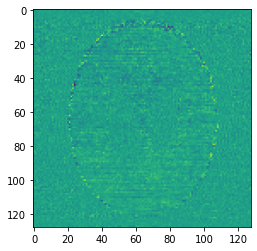

In [156]:
# Somme des k-spaces
k_sum = np.sum(kspace_8ch,axis=3)
im_ksum = bart(1,"fft -i 3",k_sum)

fig, ax = plt.subplots(ncols=4, figsize=(20, 10))
# 1 channel
ax[0].imshow(abs(np.squeeze(shepp_fft)))

# somme kspace
ax[1].imshow(abs(np.squeeze(im_ksum)))

# Somme des im
im_sum = np.sum(im_8ch,axis=3)
ax[2].imshow(abs(np.squeeze(im_sum)))

# Somme des carrés
im_sos = np.sqrt(np.sum(abs(im_8ch)**2,axis=3))
ax[3].imshow(abs(np.squeeze(im_sos)))

plt.figure()
plt.imshow(np.squeeze(abs(im_sum[:,:,0])-abs(im_ksum)))

## Retrouver la sensibilité

In [157]:
# Combinaison idéale -> Calcul carte de sensibilité
!bart caldir -h

Usage: caldir cal_size <input> <output>

Estimates coil sensitivities from the k-space center using
a direct method (McKenzie et al.). The size of the fully-sampled
calibration region is automatically determined but limited by
{cal_size} (e.g. in the readout direction).

-h		help


(128, 128, 1, 8)

(128, 128, 1, 8)

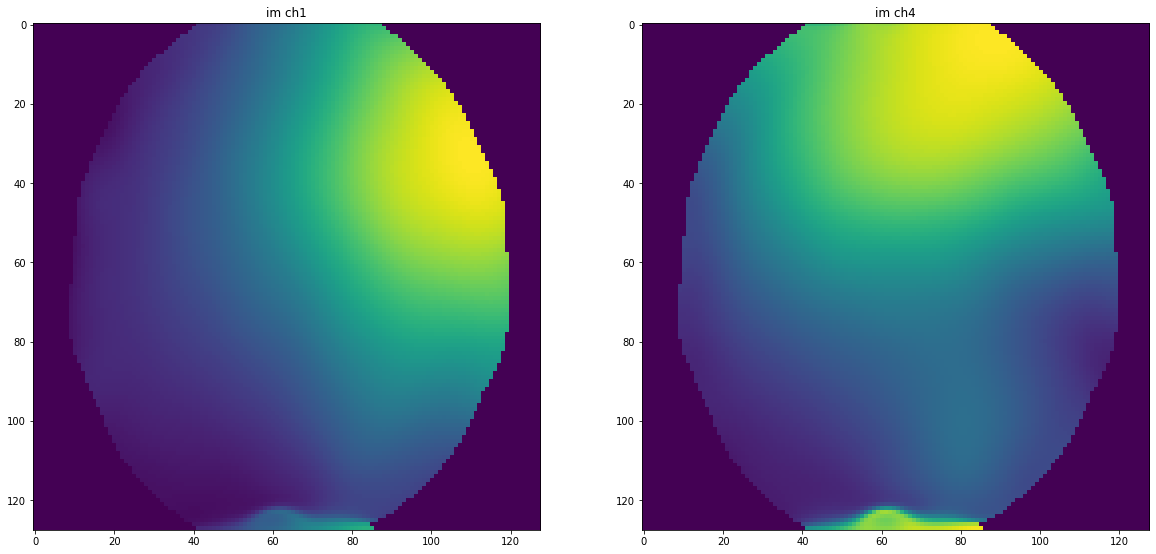

In [158]:
#sens = bart(1,"caldir 32",kspace_8ch_no_noise)
sens = bart(1,"ecalib -m1",kspace_8ch_no_noise)
#sens = bart(1,"walsh ",kspace_8ch_no_noise) # ne fonctionne pas 
#sens = sens[:,:,:,0:8]
display(np.shape(kspace_8ch_no_noise))
display(np.shape(sens))
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].set_title("im ch1")
ax[0].imshow(abs(np.squeeze(sens[:,:,:,0])))

ax[1].set_title("im ch4")
ax[1].imshow(abs(np.squeeze(sens[:,:,:,1])))

## Trouver la combinaison optimal
L'image de l'antenne L est égale à : 
$$m_l(x,y) = C_l(x,y)\ m(x,y) + n_l(x,y)$$

Ici on veut retrouver M, connaissant im_L. La matrice n'est pas carré/inversible.
Il faut utiliser -> Moore-penrose pseudo inverse

$$\hat{m}(x,y) = (C^* \  \Psi^{-1} \ C)^{-1} C^* \ \Psi^{-1}\  m_s(x,y)$$

en considérant que le bruit est non corrélé entre les antennes

$$\Psi = \sigma^2 I$$

on obtient : 
$$\hat{m}(x,y) = (C^* \ C)^{-1} C^* \  m_s(x,y) = \frac{1}{\sum_l{|C_l(x,y)|^2}} \sum_l{C_l^*(x,y) \ m_{s,l}(x,y)}$$



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


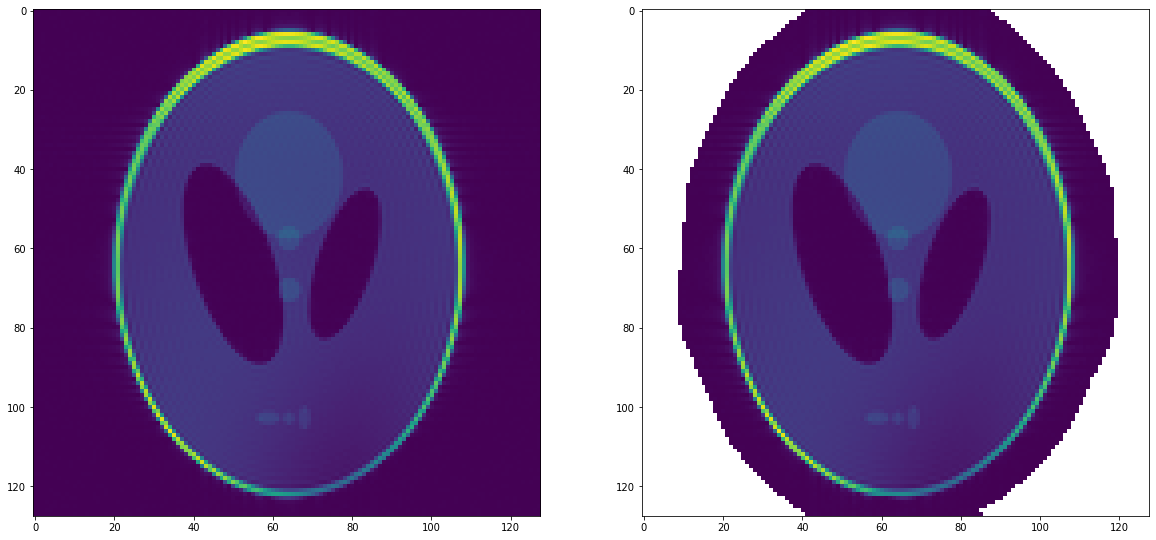

In [159]:
# combinaison idéale ->
# - The NMR phased array
# - Combination of Signals From Array Coils Using Image- Based Estimation of Coil Sensitivity Profiles

im_sens = 1/np.squeeze(np.sum(abs(sens)**2,axis=3)) * np.squeeze(np.sum(np.conj(sens) * im_8ch,axis=3))

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
# Somme des carrés
im_sos = np.sqrt(np.sum(abs(im_8ch)**2,axis=3))
ax[0].imshow(abs(np.squeeze(im_sos)))

# sense combinaison
ax[1].imshow(abs(np.squeeze(im_sens)))


In [ ]:
# play with the noise level 0 / 1000 / 10000 and compare results
!bart noise -h

Usage: noise [-s d] [-r] [-n f] <input> <output>

Add noise with selected variance to input.

-s random seed initialization
-r		real-valued input
-n variance      	DEFAULT: 1.0
-h		help


# Reconstruction imagerie parallel
L'imagerie parallèle correspond à l'accélération de l'acquisition en sautant une ligne sur 2

Elle nécessite d'avoir plusieurs antennes



## Sous-échantillonnage des données de chaque antenne

In [179]:
# mettre à 0 une ligne sur 2
kspace_8ch_no_noise = bart(1,"phantom -k -s 8")
kspace_8ch = bart(1,"noise -n 0",kspace_8ch_no_noise)

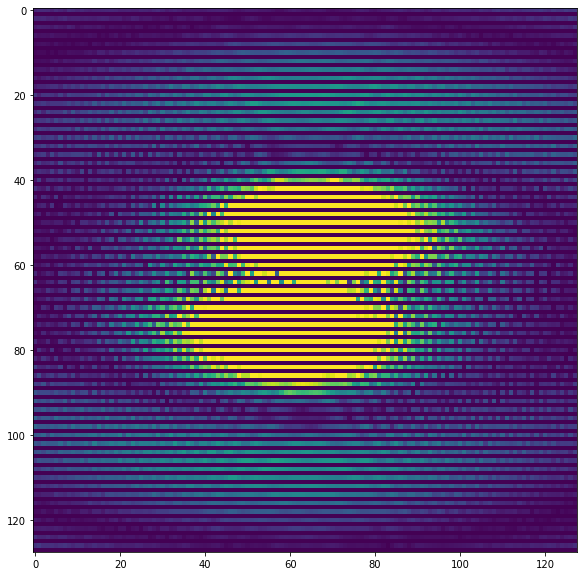

In [184]:
Rx = 2 # undersampling factor

kspace_8ch_u2 = np.zeros(kspace_8ch.shape,dtype=complex)
kspace_8ch_u2[0::Rx,:,:,:]=kspace_8ch[0::Rx,:,:,:]

figure(figsize=(20, 10))
plt.imshow(np.squeeze(abs(kspace_8ch_u2[:,:,:,1])),vmin=0, vmax=100)

## Résolution du problème
\begin{equation*}
\begin{bmatrix}
m_1(x,y) \\
m_2(x,y)\\
\vdots \\
m_l(x,y)
\end{bmatrix} = 
\begin{bmatrix}
C_1(x,y) & C_1(x+N_x/2,y) \\
C_2(x,y) & C_2(x+N_x/2,y) \\
\vdots \\
C_L(x,y) & C_L(x+N_x/2,y)
\end{bmatrix}
\begin{bmatrix}
m(x,y) \\
m(x+N_x/2,y) 
\end{bmatrix}
\end{equation*}



Implementation matlab -> https://users.fmrib.ox.ac.uk/~mchiew/docs/SENSE_tutorial.html 
qui a été implémenté en python -> https://github.com/mckib2/pygrappa/blob/025ed5470187d654fa9acc23d84b68c87bbe8f33/pygrappa/sense1d.py#L8

```
function out = SENSE(input,sens,R)
    [Nx,Ny,Nz,Nc] = size(input);
    out = zeros(Nx,Ny);
    % loop over the top-1/R of the image
    for x = 1:Nx/R
        x_idx = x:Nx/R:Nx;
        % loop over the entire left-right extent
        for y = 1:Ny
            % pick out the sub-problem sensitivities
            S = transpose(reshape(sens(x_idx,y,1,:),R,[]));
            % solve the sub-problem in the least-squares sense
            out(x_idx,y) = pinv(S)*reshape(input(x,y,1,:),[],1);
        end
    end
end
```



In [185]:
def sense_reco2(im, sens, Rx=1):

    nx, ny, nz, nc = im.shape[:]
    res = np.zeros((nx, ny, nz), dtype=im.dtype)

    # loop over the top 1/R of the image, use einsum to get all the
    # inner loops where the subproblems are extracted and solved
    # in the least squares sense
    for x in range(int(nx/Rx)):
        x_idx = np.arange(x, nx, step=int(nx/Rx))
        #display(x_idx)
        
        for y in range(ny):
          # pick out the sub-problem sensitivities
          S = np.transpose(np.reshape(sens[x_idx, y,0, :],(Rx,-1),order='C'))
          # solve the sub-problem in the least-squares sense
          res[x_idx, y] = np.linalg.pinv(S) @ np.reshape(im[x,y,0,:],(-1,1),order='C')

    return res


def sense_reco(im, sens, Rx=1):
    im = np.squeeze(im)
    sens = np.squeeze(sens)
    nx, ny, _nc = im.shape[:]
    res = np.zeros((nx, ny), dtype=im.dtype)

    # loop over the top 1/R of the image, use einsum to get all the
    # inner loops where the subproblems are extracted and solved
    # in the least squares sense
    for x in range(int(nx/Rx)):
        x_idx = np.arange(x, nx, step=int(nx/Rx))
        S = sens[x_idx, ...].transpose((1, 2, 0))

        # Might be more efficient way then explicit pinv along axis?
        res[x_idx, :] = np.einsum(
            'ijk,ik->ij', np.linalg.pinv(S), im[x, ...]).T
    

    # Remove pad if Rx is odd
    if Rx % 2 > 0:
        res = res[:-1, ...]

    return res



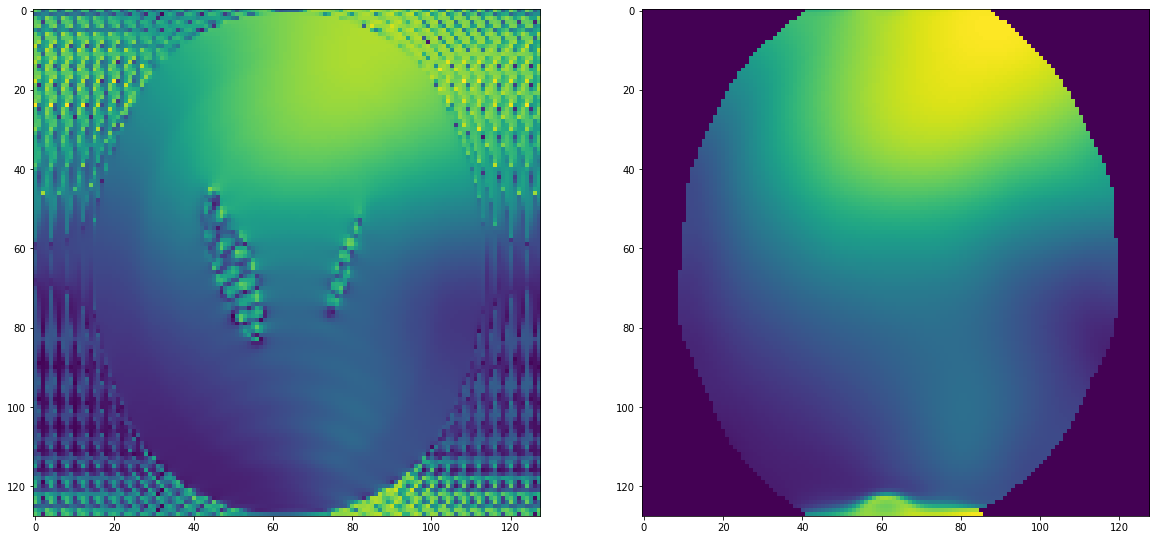

In [186]:
sens = bart(1,"caldir 32",kspace_8ch_no_noise)

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
ax[0].imshow(abs(np.squeeze(sens[:,:,:,1])))


sens = bart(1,"ecalib -m1",kspace_8ch_no_noise)
ax[1].imshow(abs(np.squeeze(sens[:,:,:,1])))

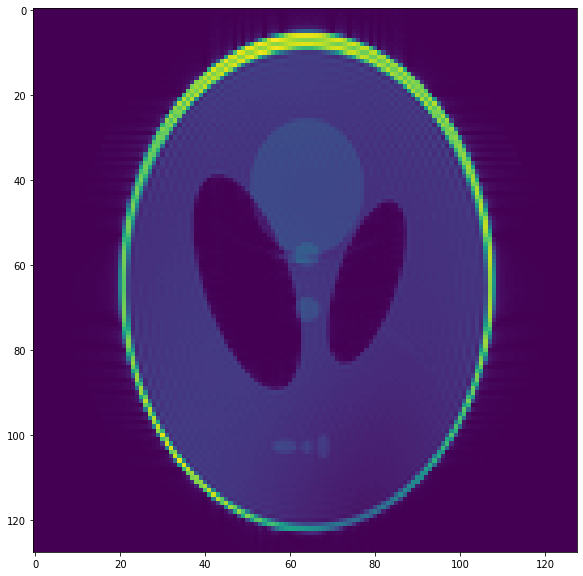

In [187]:
im_8ch_u = bart(1,"fft -i 3",kspace_8ch_u2)

res = sense_reco2(im_8ch_u, sens, Rx)

figure(figsize=(20, 10))
plt.imshow(np.squeeze(abs(res)))

## Estimer la carte gfactor
Pour cela nous allons utiliser une méthode pseudo replica
On refait la même reconstruction en ajoutant un bruit sur les données et on calcul la STD à la fin

In [188]:
## Estimer la carte gfactor
import random
PR = 20
nx,ny,nz,nc = im_8ch_u.shape

res = np.zeros((nx,ny,nz,PR),dtype=complex)
for i in range(PR):
  seed = random.randint(0,10000000)
  im_8ch_u_pr = bart(1,"noise -n 10 -s " + str(seed) ,im_8ch_u)
  res[:,:,:,i] = sense_reco2(im_8ch_u_pr, sens, Rx)
  display(str(i) + "iter -> noise -n 10 -s " + str(seed))

'0iter -> noise -n 10 -s 4769512'

'1iter -> noise -n 10 -s 6977956'

'2iter -> noise -n 10 -s 3546302'

'3iter -> noise -n 10 -s 4713630'

'4iter -> noise -n 10 -s 9501770'

'5iter -> noise -n 10 -s 2703642'

'6iter -> noise -n 10 -s 1157297'

'7iter -> noise -n 10 -s 390284'

'8iter -> noise -n 10 -s 4746451'

'9iter -> noise -n 10 -s 6508344'

'10iter -> noise -n 10 -s 4899105'

'11iter -> noise -n 10 -s 5132817'

'12iter -> noise -n 10 -s 4066507'

'13iter -> noise -n 10 -s 9229446'

'14iter -> noise -n 10 -s 9404181'

'15iter -> noise -n 10 -s 5175058'

'16iter -> noise -n 10 -s 5408336'

'17iter -> noise -n 10 -s 4449567'

'18iter -> noise -n 10 -s 8782317'

'19iter -> noise -n 10 -s 1535970'

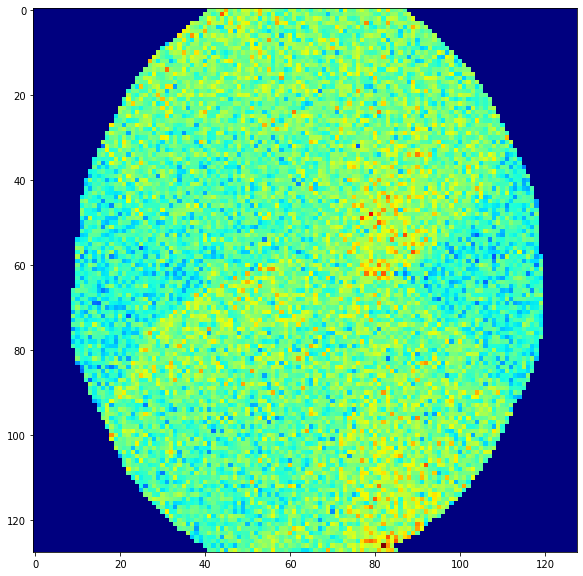

In [189]:
res_std = np.std(abs(res),axis=3)

figure(figsize=(20, 10))
plt.imshow(np.squeeze(abs(res_std)),cmap='jet')

#plt.imshow(np.squeeze(abs(res[:,:,:,3])))

## Imagerie non-cartésienne

In [190]:
!bart traj -h

Usage: traj [-x d] [-y d] [-d d] [-e d] [-a d] [-t d] [-m d] [-l] [-g] [-r] [-G] [-H] [-s d] [-D] [-R f] [-q ...] [-Q ...] [-O] [-3] [-c] [-E] [-z ...] [-C <string>] [-V <string>] <output>

Computes k-space trajectories.

-x x      	readout samples
-y y      	phase encoding lines
-d d      	full readout samples
-e e      	number of echoes
-a a      	acceleration
-t t      	turns
-m mb      	SMS multiband factor
-l		aligned partition angle
-g		golden angle in partition direction
-r		radial
-G		golden-ratio sampling
-H		halfCircle golden-ratio sampling
-s # Tiny GA      	tiny golden angle
-D		projection angle in [0,360°), else in [0,180°)
-R phi      	rotate
-q delays      	gradient delays: x, y, xy
-Q delays      	(gradient delays: z, xz, yz)
-O		correct transverse gradient error for radial tajectories
-3		3D
-c		asymmetric trajectory [DC sampled]
-E		multi-echo multi-spoke trajectory
-z Ref:Acel      	Undersampling in z-direction.
-C file      	custom_angle file [phi + i * psi]
-V file

(3, 128, 32)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


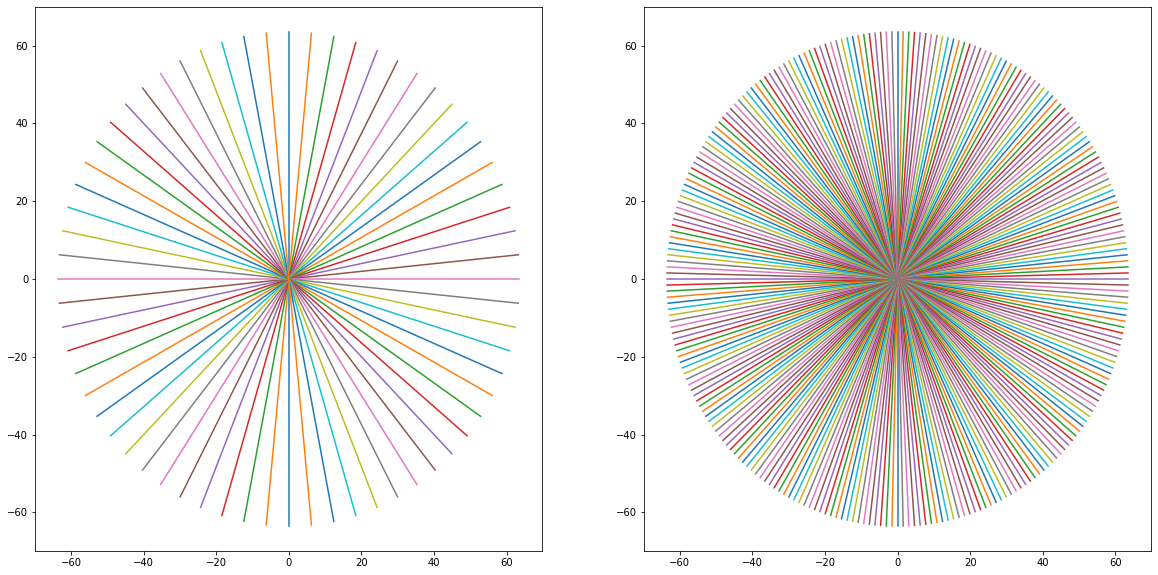

In [191]:
ktraj_32p = bart(1,"traj -r -x 128 -y 32")
display(np.shape(ktraj))
ktraj_128p = bart(1,"traj -r -x 128 -y 128")

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
# 32 proj
ax[0].plot(ktraj_32p[0,:,:],ktraj_32p[1,:,:]);

# 128 proj
ax[1].plot(ktraj_128p[0,:,:],ktraj_128p[1,:,:]);

In [83]:
kspace_32p = bart(1,"phantom -s 8 -k -t",ktraj_32p)
kspace_128p = bart(1,"phantom -s 8 -k -t",ktraj_128p)

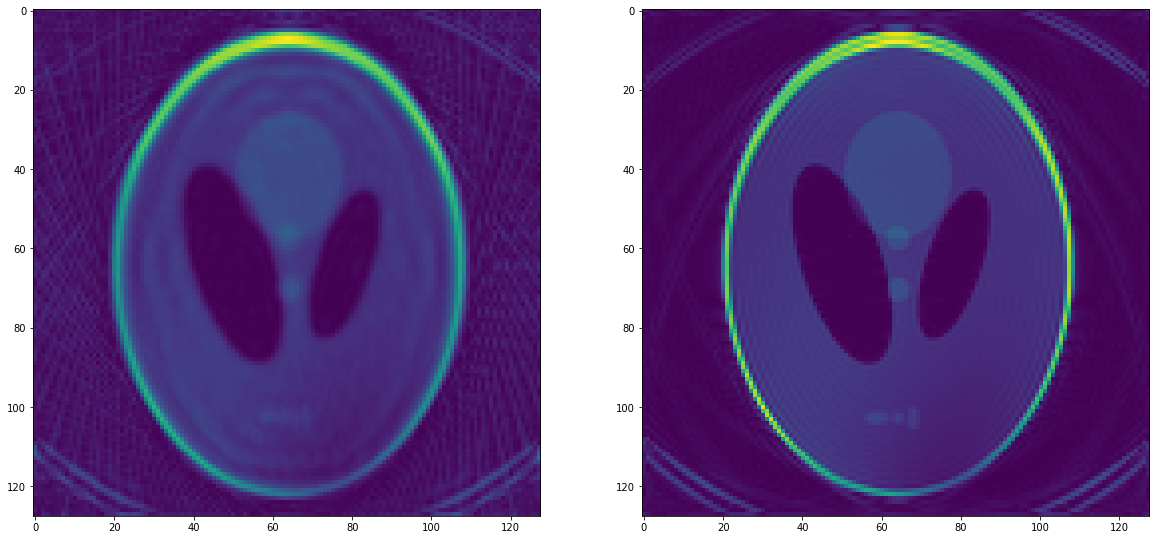

In [193]:
im_32p = bart(1,"nufft -i",ktraj_32p,kspace_32p)
im_32p_sos = bart(1,"rss 8",im_32p)

im_128p = bart(1,"nufft -i",ktraj_128p,kspace_128p)
im_128p_sos = bart(1,"rss 8",im_128p)

fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
# 32 proj
ax[0].imshow(abs(im_32p_sos))
# 128 proj
ax[1].imshow(abs(im_128p_sos))

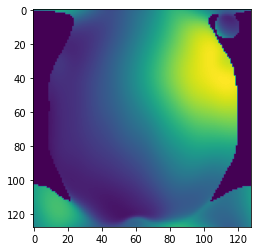

In [94]:
# sensitivities
kspace_32p_cart = bart(1,"fft 3",im_32p)
sens = bart(1,"ecalib -m1",kspace_32p_cart)

plt.imshow(abs(sens[:,:,0,0]))

(128, 128)

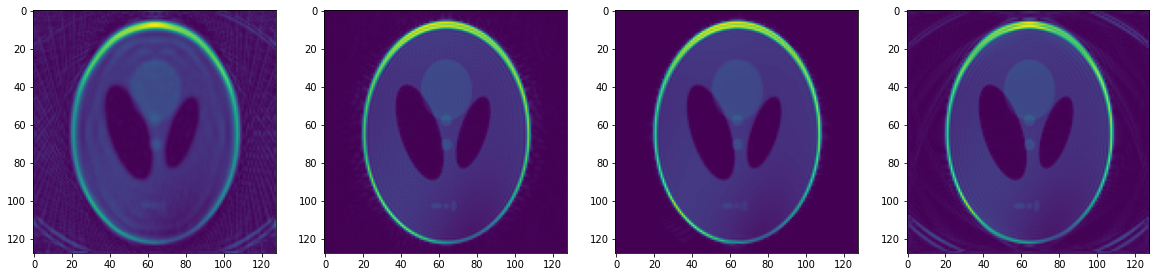

In [197]:
# CS
cfl.writecfl("traj_32p",ktraj_32p)
cfl.writecfl("kspace_32p",kspace_32p)
cfl.writecfl("sens",sens)
im_CS = bart(1,"pics -d3 -i200 -e -S -R W:3:0:0.001 -t traj  ",kspace_32p,sens)

#im_nufft_l2 = bart(1,"nlinv -i 30 -t traj",kspace_32p)

display(np.shape(im_nufft_l2))

fig, ax = plt.subplots(ncols=4, figsize=(20, 10))
# 32 proj
ax[0].imshow(abs(im_32p_sos))
# 32 proj + L2
ax[1].imshow(abs(im_nufft_l2))

# 32 proj + CS
ax[2].imshow(abs(im_CS))

# 128 proj
ax[3].imshow(abs(im_128p_sos))

In [112]:
!bart pics -d3 -e -R W:3:0:0.01 -t traj kspace_32p sens out

[  1 128  32   8   1   1   1   1   1   1   1   1   1   1   1   1 ]
[128 128   1   8   1   1   1   1   1   1   1   1   1   1   1   1 ]
ksp : [  1 128  32   8   1   1   1   1   1   1   1   1   1   1   1   1 ]
cim : [128 128   1   8   1   1   1   1   1   1   1   1   1   1   1   1 ]
traj: [  3 128  32   1   1   1   1   1   1   1   1   1   1   1   1   1 ]
NUFFT: Toeplitz mode
Allocating 4096 (vs. 69632) + 65536
ksp : [  1 128  32   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 ]
cim : [256 256   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 ]
traj: [  3 128  32   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 ]
Scaling: 5046.155273  (max = 6330.764160/p90 = 5046.155273/median = 3172.303955)
Inverse scaling of the data: 5046.155273
Maximum eigenvalue: 2.04e+01
l1-wavelet regularization: 0.010000
FISTA
Total Time: 0.941646


In [120]:
!bart nlinv -h

Usage: nlinv [-i d] [-d d] [-c] [-N] [-m d] [-U] [-f f] [-p <string>] [-t <string>] [-I <string>] [-g] [-S] [--lowmem] <kspace> <output> [<sensitivities>]

Jointly estimate image and sensitivities with nonlinear
inversion using {iter} iteration steps. Optionally outputs
the sensitivities.

-i iter      	Number of Newton steps
-d level      	Debug level
-c		Real-value constraint
-N		Do not normalize image with coil sensitivities
-m nmaps      	Number of ENLIVE maps to use in reconstruction
-U		Do not combine ENLIVE maps in output
-f FOV      	restrict FOV
-p file      	pattern / transfer function
-t file      	kspace trajectory
-I file      	File for initialization
-g		use gpu
-S		Re-scale image after reconstruction
--lowmem		Use low-mem mode of the nuFFT
-h		help


In [126]:
!bart walsh -h

Usage: walsh [-r ...] [-b ...] <input> <output>

Estimate coil sensitivities using walsh method (use with ecaltwo).

-r cal_size      	Limits the size of the calibration region.
-b block_size      	Block size.
-h		help


In [136]:
!bart ecaltwo -h

Usage: ecaltwo [-c f] [-m d] [-S] x y z <input> <sensitivities> [<ev_maps>]

Second part of ESPIRiT calibration.
Optionally outputs the eigenvalue maps.

-c crop_value      	Crop the sensitivities if the eigenvalue is smaller than {crop_value}.
-m maps      	Number of maps to compute.
-S		Create maps with smooth transitions (Soft-SENSE).
-h		help


In [139]:
!bart

BART. Available commands are:
avg         bench       bin         bitmask     cabs        caldir      
calmat      carg        casorati    cc          ccapply     cdf97       
circshift   conj        conv        conway      copy        cpyphs      
creal       crop        delta       ecalib      ecaltwo     estdelay    
estdims     estshift    estvar      extract     fakeksp     fft         
fftmod      fftrot      fftshift    filter      flatten     flip        
fmac        homodyne    index       invert      itsense     join        
looklocker  lrmatrix    mandelbrot  mip         moba        mobafit     
nlinv       noise       normalize   nrmse       nufft       ones        
pattern     phantom     pics        pocsense    poisson     pol2mask    
poly        repmat      reshape     resize      rmfreq      rof         
roistat     rss         rtnlinv     sake        saxpy       scale       
sdot        show        signal      slice       spow        sqpics      
squeeze     ssa      